In [1]:
# Dependencies 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk


In [19]:
# Some paths
rootPath = '/Users/frederictheunissen/Code/songephys/'
dataPath = 'data/birds/'

# Our color code for calls
callColor = {'Be': (0/255.0, 230/255.0, 255/255.0), 'LT': (0/255.0, 95/255.0, 255/255.0), 'Tu': (255/255.0, 200/255.0, 65/255.0), 'Th': (255/255.0, 150/255.0, 40/255.0), 
             'Di': (255/255.0, 105/255.0, 15/255.0), 'Ag': (255/255.0, 0/255.0, 0/255.0), 'Wh': (255/255.0, 180/255.0, 255/255.0), 'Ne': (255/255.0, 100/255.0, 255/255.0),
             'Te': (140/255.0, 100/255.0, 185/255.0), 'DC': (100/255.0, 50/255.0, 200/255.0), 'So': (0/255.0, 0/255.0, 0/255.0)}

# Call names are in alphabetical order (to check...)

callNames = ['Ag', 'Be', 'DC', 'Di', 'LT', 'Ne', 'So', 'Te', 'Th']

In [11]:


# First load the data

numUnits = [1, 2, 3, 5, 10, 20]
argList = []
pcc = []
confMat = []

for nUnit in numUnits:
    inPath = rootPath+ dataPath + 'HerminaDataBase%dGoodUnitPCNW.pkl' % nUnit
    fileIn = open(inPath,"rb")
    argList.append(pk.load(fileIn))
    confMat.append(pk.load(fileIn))
    pcc.append(pk.load(fileIn))
    fileIn.close()


In [12]:
def info_matrix(conf_matrix):

# Calculates the mutual information from a confusion matrix.
# This code assumes that the rows are the actual categories and that they are equally probable
# This mutual information is not corrected for low probabilities.

    ncat = conf_matrix.shape[0]
    prob_matrix = np.copy(conf_matrix)

    for i in range(ncat):
        if (np.sum(conf_matrix[i,:]) < 0.9999 or np.sum(conf_matrix[i,:]) >  1.0001):
            print('Error: Row', i, 'does not sum to 1')
            return 0.0
    
    prob_matrix /= ncat

        

    # Check for sum = 1
    sump = np.sum(prob_matrix)
    if ( sump < 0.9999 or sump > 1.0001):
        print('Error in info_matrix: input matrix sums to %f' % sump)
        return 0.0


    prob_matrix_for_entropy = np.copy(prob_matrix)
    prob_matrix_for_entropy[prob_matrix ==0] = 1    # Set 0 to 1 to insure that xlogx goes to zero as x goes to zero
    tot_ent = np.sum(-prob_matrix_for_entropy*np.log2(prob_matrix_for_entropy))

    row_prob = np.sum(prob_matrix, axis=0)
    row_prob[row_prob == 0] = 1  # Set 0 to 1 to insure that xlogx goes to zero as x goes to zero
    row_ent = np.sum(-row_prob*np.log2(row_prob))

    col_prob = np.sum(prob_matrix, axis=1)
    col_prob[col_prob == 0] = 1  # Set 0 to 1 to insure that xlogx goes to zero as x goes to zero
    col_ent = np.sum(-col_prob*np.log2(col_prob));

    mi = row_ent + col_ent - tot_ent;

    return mi

In [20]:
callNames

['Ag', 'Be', 'DC', 'Di', 'LT', 'Ne', 'So', 'Te', 'Th']

In [21]:
ncalls = len(callNames)

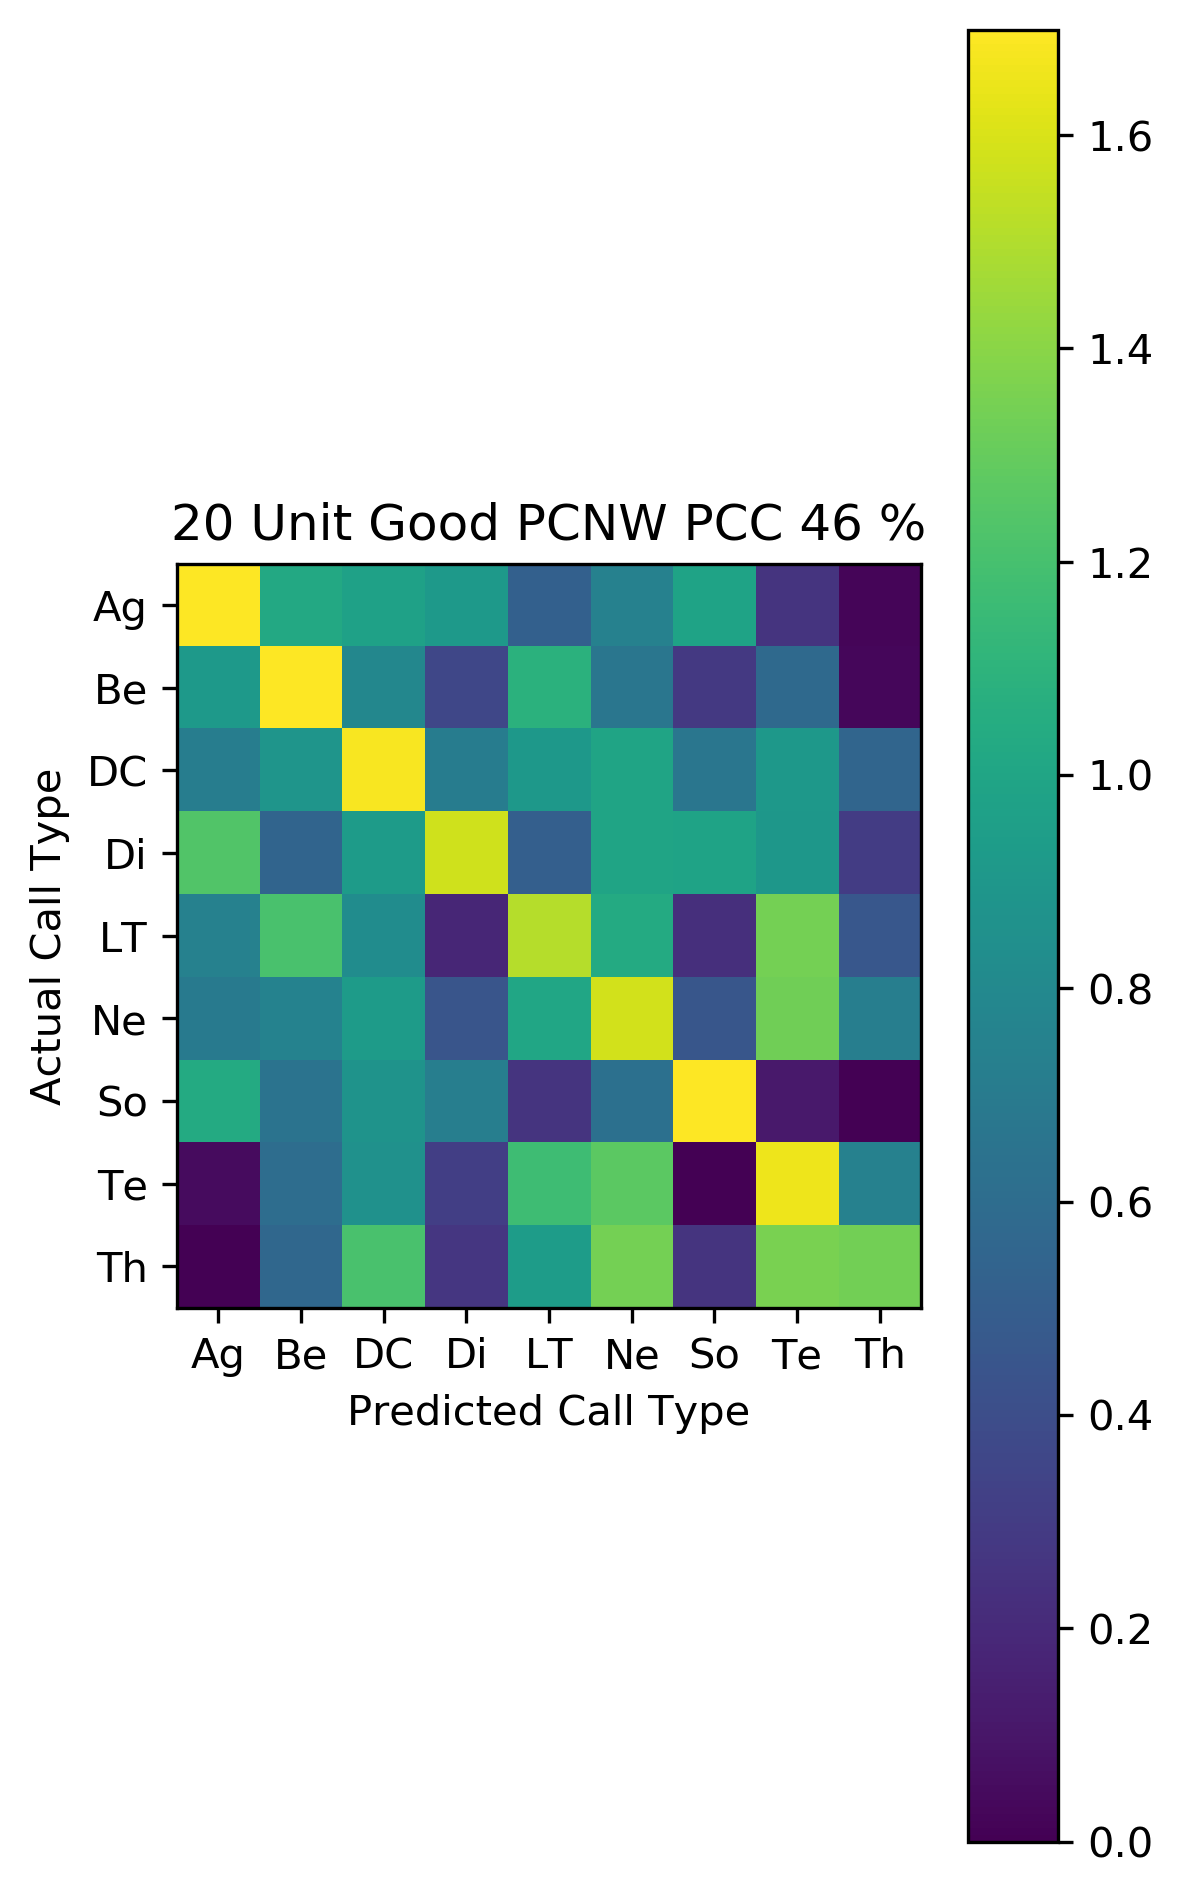

In [22]:
fig = plt.figure(figsize=(4,8), dpi=300)
ax = fig.subplots()
cmap='viridis'
ncalls = confMat[0].shape[0]
ind = 5

im_ = ax.imshow(np.log10(confMat[ind]*100.0), interpolation='nearest', cmap=cmap, extent = (-0.5, ncalls-0.5, ncalls-0.5, -0.5), vmin=np.log10(1), vmax = np.log10(50))

fig.colorbar(im_, ax=ax)
ax.set(xticks=np.arange(ncalls),
               yticks=np.arange(ncalls),
               ylim = (ncalls-0.5, -0.5),
               xticklabels=callNames,
               yticklabels=callNames,
               ylabel="Actual Call Type",
               xlabel="Predicted Call Type",
               title='%d Unit Good PCNW PCC %.0f %%' % (numUnits[ind], np.mean(pcc[ind])))


plt.savefig('/Users/frederictheunissen/Desktop/confMat20UnitGoodPCLogHerminaNW.eps')


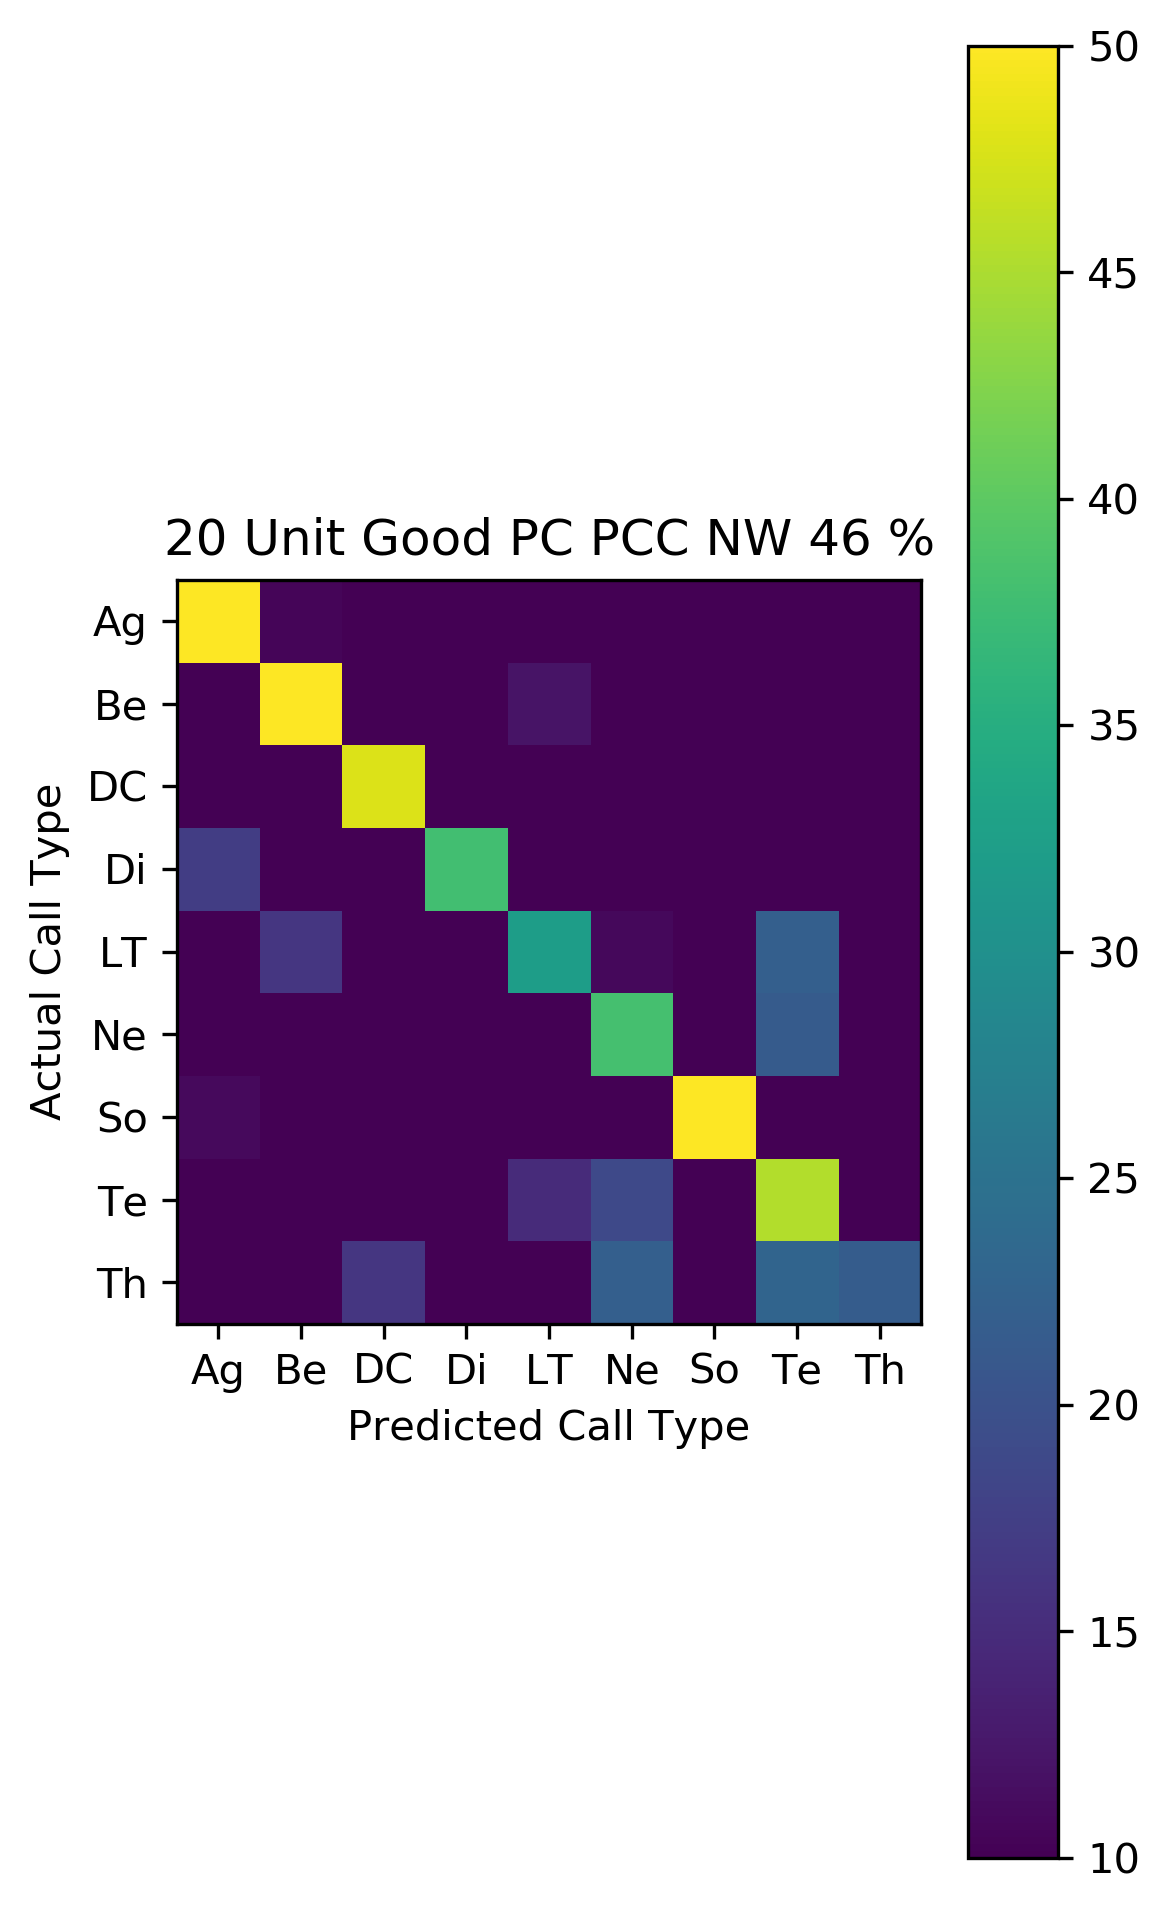

In [25]:
fig = plt.figure(figsize=(4,8), dpi=300)
ax = fig.subplots()
cmap='viridis'
ncalls = confMat[0].shape[0]
ind = 5

im_ = ax.imshow(confMat[ind]*100.0, interpolation='nearest', cmap=cmap, extent = (-0.5, ncalls-0.5, ncalls-0.5, -0.5), vmin=10, vmax = 50)

fig.colorbar(im_, ax=ax)
ax.set(xticks=np.arange(ncalls),
               yticks=np.arange(ncalls),
               ylim = (ncalls-0.5, -0.5),
               xticklabels=callNames,
               yticklabels=callNames,
               ylabel="Actual Call Type",
               xlabel="Predicted Call Type",
               title='%d Unit Good PC PCC NW %.0f %%' % (numUnits[ind], np.mean(pcc[ind])))


plt.savefig('/Users/frederictheunissen/Desktop/confMat20UnitGoodPCHerminaNW.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


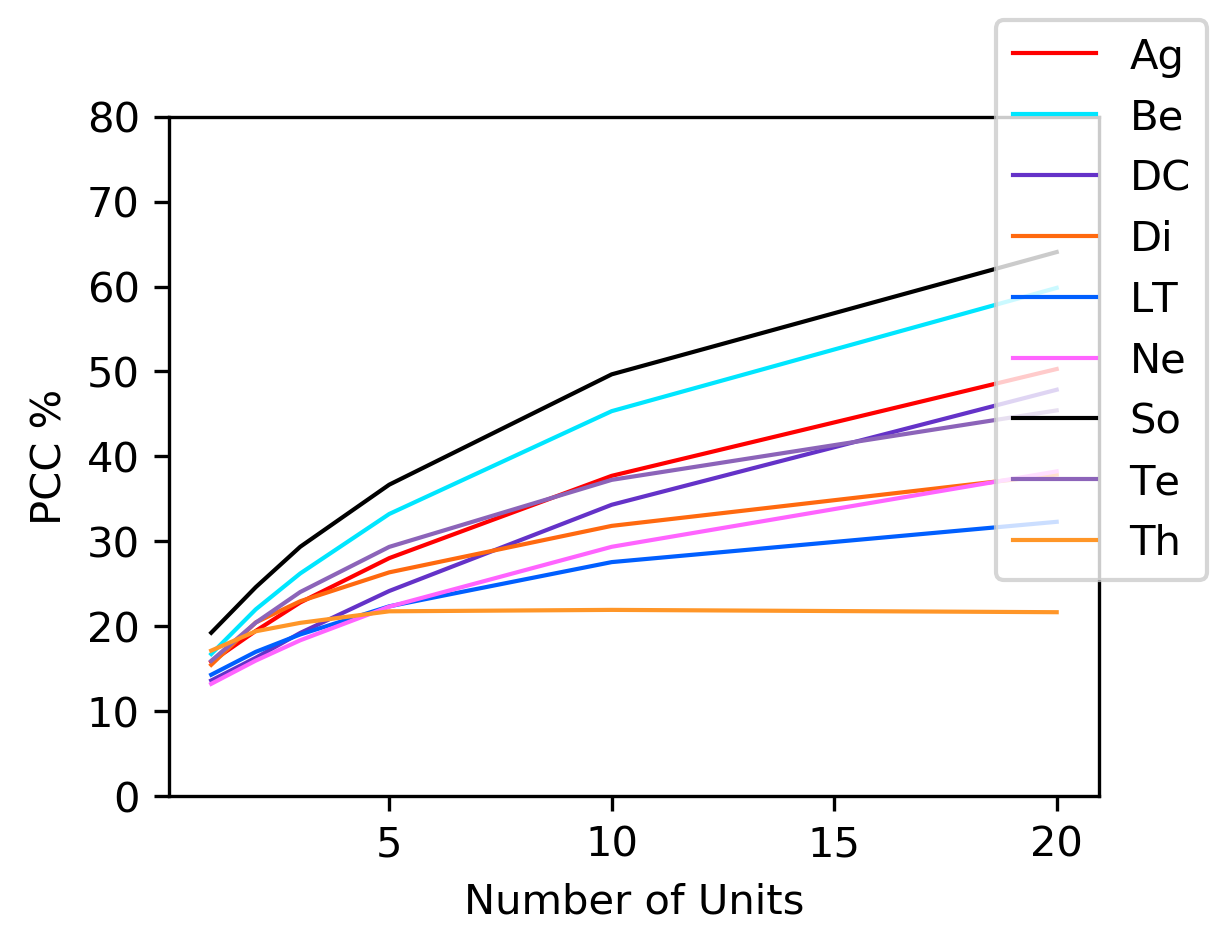

In [24]:
# Make plot of mean values
fig, ax1 = plt.subplots(figsize=(4, 3), dpi =300)

ax1.set_xlabel('Number of Units')
ax1.set_ylabel('PCC %')

for ic, call in enumerate(callNames):
    pccCall = np.zeros(len(numUnits))
    for iu, nUnit in enumerate(numUnits):
        pccCall[iu] = confMat[iu][ic,ic]*100.0        
    ax1.plot(numUnits, pccCall, color= callColor[call], linestyle='-', linewidth=1, label=call)

ax1.set_ylim((0,80))

fig.legend()


plt.savefig('/Users/frederictheunissen/Desktop/PCCvsUnitsperCallTypeHerminaNW.eps')

In [43]:
# Set paths
#rootPathH = '/Users/frederictheunissen/Code/songephys/'
#dataPathH = 'data/birds/'

rootPathJ = '/Users/frederictheunissen/Google Drive/My Drive/julie/'
pklPathJ = 'pkl/'


# Read data files 
#inPathH = rootPathH+dataPathH+'summarySel.pkl'
#fileInH = open(inPathH,"rb")
#dfSummaryH = pk.load(fileInH)
#fileInH.close()

# Add a field called site_unit to match what is in argList
#dfSummaryH['site_unit'] = dfSummaryH['site']+ '_' + dfSummaryH['unit']

# Read data files 
inPathJ = rootPathJ+pklPathJ+'summarySelJulie.pkl'
fileInJ = open(inPathJ,"rb")
dfSummaryJ = pk.load(fileInJ)
fileInJ.close()

# Add a field called site_unit to match what is in argList
dfSummaryJ['site_unit'] = dfSummaryJ['site']+ '_' + dfSummaryJ['unit']

In [1]:
from random import sample

indToPlot = [0, 4, 5, 6]
fig = plt.figure(figsize=(4,12), dpi=300)
axes = fig.subplots( nrows = len(indToPlot), ncols = 1)


for i, ind in enumerate(indToPlot):    
    ax = axes[i]
    if (i == 0) :
        ax.scatter(pccValList[ind], selIndList[ind], s=1, color='grey', marker = ',')
    else:
        selInd = sample(range(len(pccValList[ind])), 1000)
        ax.scatter(pccValList[ind][selInd], selIndList[ind][selInd], s=1, color='grey', marker = ',')
        
    # fit a linear curve an estimate its y-values and their error.
    a, b = np.polyfit(pccValList[ind], selIndList[ind], deg=1)
    if "i == 0" :
        x = pccValList[ind]
        indSort = np.argsort(x)
        x = x[indSort]
        y = selIndList[ind][indSort]
    else:
        x = pccValList[ind][selInd]
        y = selIndList[ind][selInd]
        indSort = np.argsort(x)
        x = x[indSort]
        y = y[indSort]
    
    y_est = a * x + b
    y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))


    ax.plot(x, y_est, '-')
    ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)

    ax.set(    xlim=(0,80),
               ylim=(0,1),
               ylabel="Sel Ind",
               title='%d' % numUnits[ind] )
    if (i == 3):
        ax.set(xlabel="PCC")

# fig.colorbar(im_, ax=ax)
plt.savefig('/Users/frederictheunissen/Desktop/scatterSelPCC.png')

NameError: name 'plt' is not defined

In [11]:
## Read the values obtained from the entire data base for 1 unit to make matched histograms and confusion mat

inPath = rootPath+ dataPath + 'HerminaDataBase1Unitz.pkl' 
fileIn = open(inPath,"rb")
unitNameZ = pk.load(fileIn)
confMatZ = pk.load(fileIn)
pccZ = pk.load(fileIn)
fileIn.close()

inPath = rootPath+ dataPath + 'HerminaDataBase1UnitPC.pkl' 
fileIn = open(inPath,"rb")
unitNamePC = pk.load(fileIn)
confMatPC = pk.load(fileIn)
pccPC = pk.load(fileIn)
fileIn.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


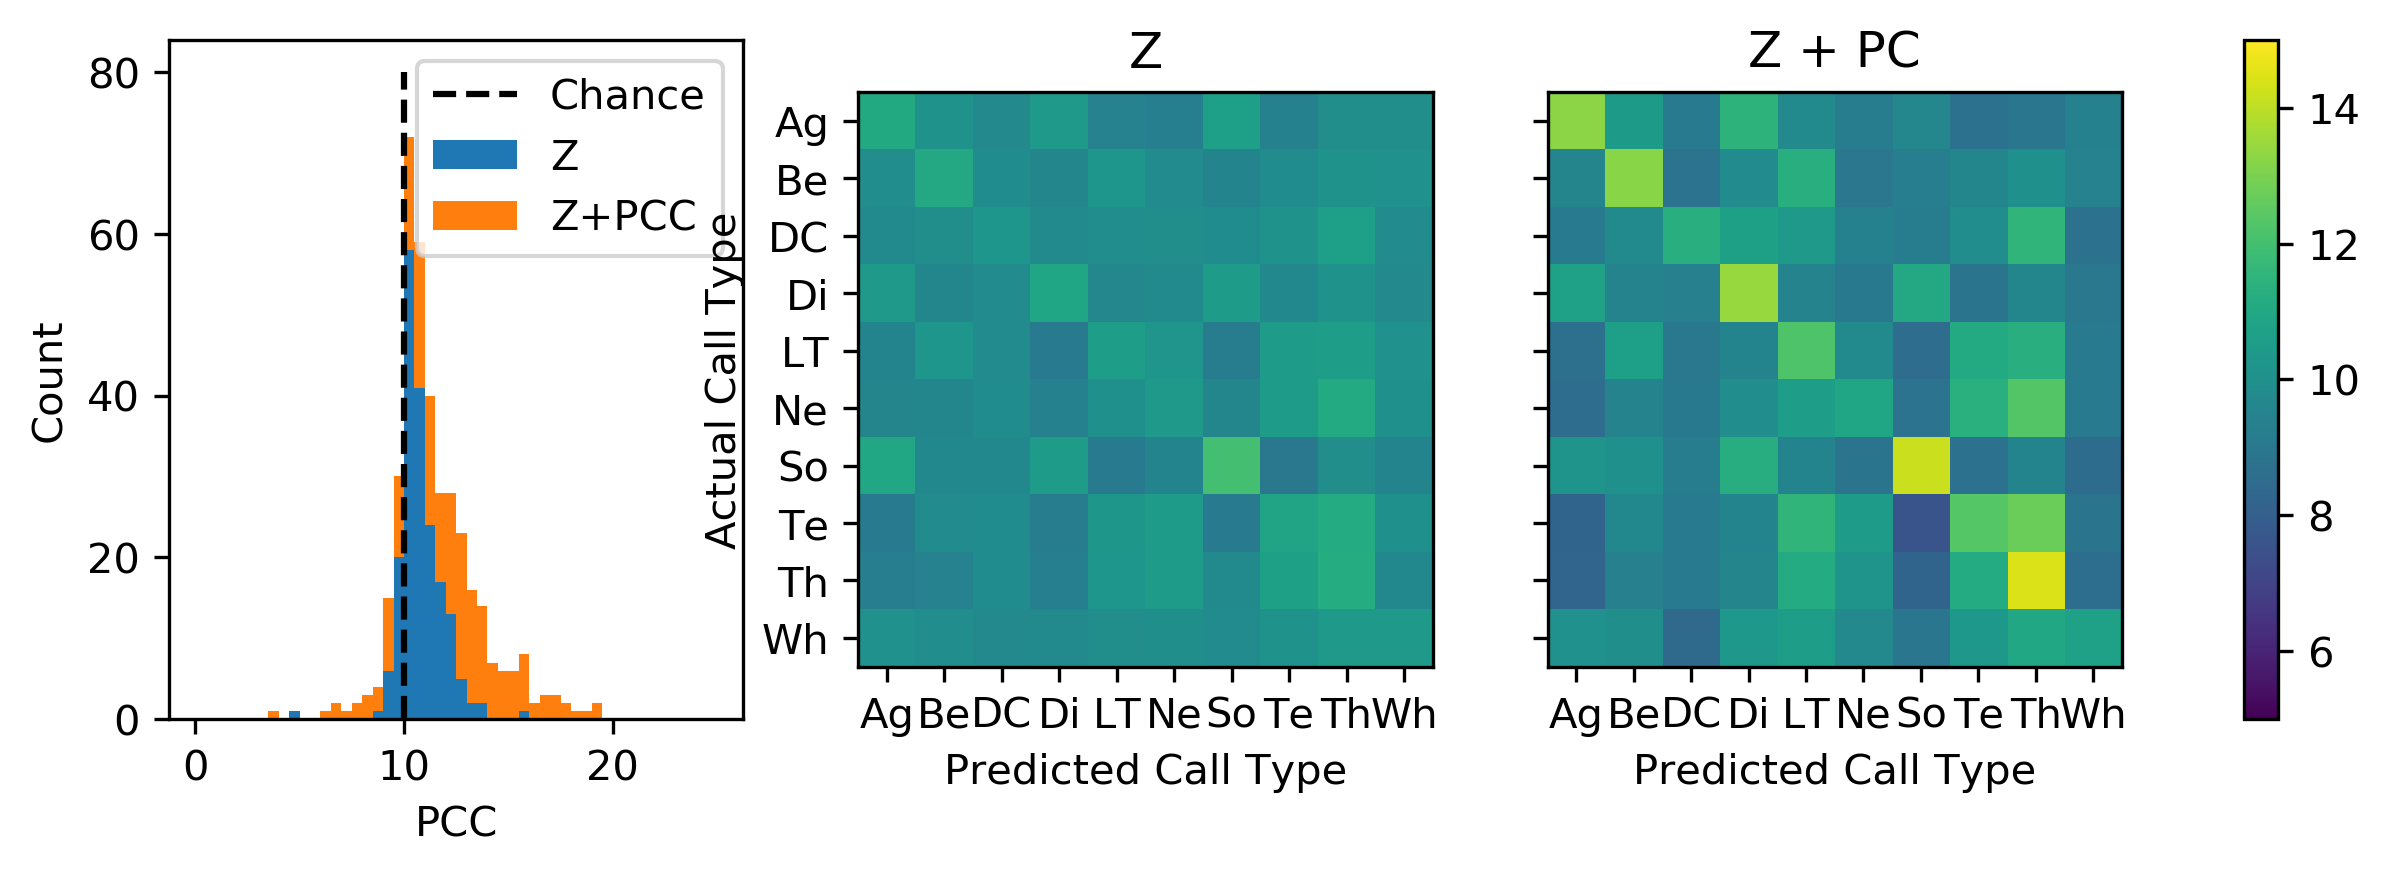

In [34]:
fig = plt.figure(figsize=(10.5,3), dpi=300)
ax = fig.subplots(nrows=1, ncols=3)
cmap='viridis'

ax[0].hist([pccZ, pccPC], bins = 50, range = (0,25), stacked=True)
ax[0].plot([10, 10], [0,80], '--', color='black')
ax[0].set_xlabel('PCC')
ax[0].set_ylabel('Count')
ax[0].legend(['Chance', 'Z','Z+PCC'])

im_ = ax[1].imshow(confMatZ*100.0, interpolation='nearest', cmap=cmap, extent = (-0.5, ncalls-0.5, ncalls-0.5, -0.5), vmin=5, vmax = 15)

ax[1].set(
               xticks=np.arange(ncalls),
               yticks=np.arange(ncalls),
               ylim = (ncalls-0.5, -0.5),
               xticklabels=callNames,
               yticklabels=callNames,
               ylabel="Actual Call Type",
               xlabel="Predicted Call Type",
               title='Z' )

im_ = ax[2].imshow(confMatPC*100.0, interpolation='nearest', cmap=cmap, extent = (-0.5, ncalls-0.5, ncalls-0.5, -0.5), vmin=5, vmax = 15)

ax[2].set(
               xticks=np.arange(ncalls),
               yticks=np.arange(ncalls),
               ylim = (ncalls-0.5, -0.5),
               xticklabels=callNames,
               yticklabels=[],
               ylabel=None,
               xlabel="Predicted Call Type",
               title='Z + PC' )

fig.colorbar(im_, ax=ax)


plt.savefig('/Users/frederictheunissen/Desktop/pcchist1UnitFULLZvsPCwScale.eps')

In [42]:
len(np.linspace(-500, 499, 1000))

1000

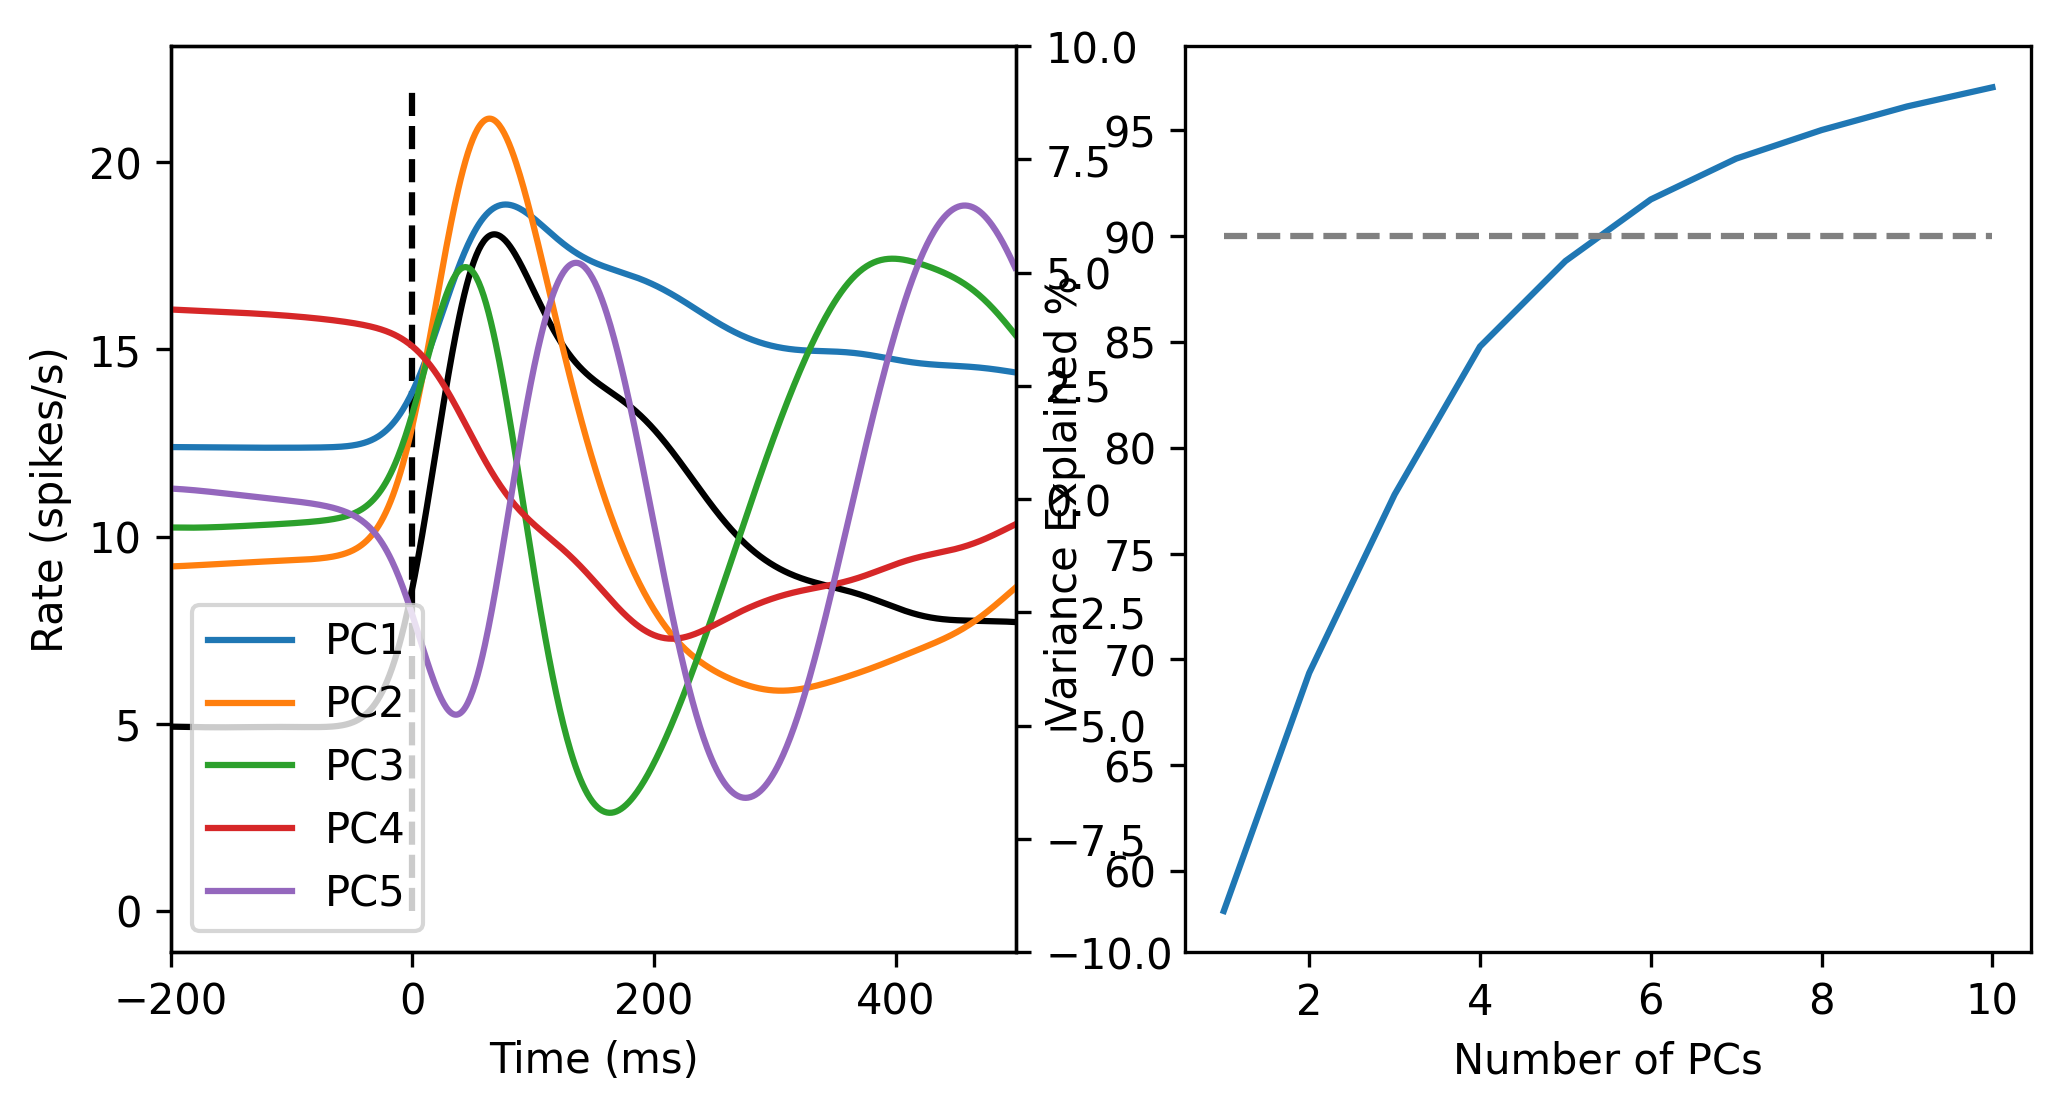

In [5]:
fig = plt.figure(figsize=(8,4), dpi = 300)
ax = fig.subplots(nrows=1, ncols=2)
t = np.linspace(-500, 499, 1000)

ax[0].plot(t, pcKDE.mean_, label='Mean', color = 'black')
ax[0].plot([0, 0], [0,22], '--', color = 'black')
ax[0].set( xlabel = 'Time (ms)', ylabel = 'Rate (spikes/s)' , xlim=(-200, 500))


ax2 = ax[0].twinx()
ax2.plot(t, pcKDE.components_[0,:]*100, label='PC1')
ax2.plot(t, pcKDE.components_[1,:]*100, label='PC2')
ax2.plot(t, pcKDE.components_[2,:]*100, label='PC3')
ax2.plot(t, pcKDE.components_[3,:]*100, label='PC4')
ax2.plot(t, pcKDE.components_[4,:]*100, label='PC5')
ax2.set( ylim = (-10,10))


ax2.legend()

ax[1].plot(np.linspace(1,10, num=10), np.cumsum(pcKDE.explained_variance_ratio_)*100)
ax[1].plot( [1, 10], [90, 90], '--', color = 'grey')
ax[1].set ( xlabel = 'Number of PCs', ylabel = 'Variance Explained %' )

plt.savefig('/Users/frederictheunissen/Desktop/PCAVarianceExplainedJulie.pdf')